In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Download all three Microsoft BotBuilder Personality Chat Datasets on Google Colab virtual server
# https://drive.google.com/file/d/1S0IXBJZXz13RQwlgkZ_FmypdOoAL1DpG/view?usp=sharing
#chats.csv DOTA dataset 1.4 million
download_files = [{'id':'1TJVC6VGiAqrMzNbh_-a70FWlR6zzLuvP','file_name':'45k_before_finalise.csv'},
          {'id':'1S0IXBJZXz13RQwlgkZ_FmypdOoAL1DpG','file_name':'45k_final_version.csv'},
          {'id':'1COTg4XC0fk1cVkw1eTi1cru--O-53Cei','file_name':'50k.csv'}, 
          {'id':'1n1cIwfqqUIYipKI6Gn8tVwS9XRNNYW8q','file_name':'chat.csv'}, 
          {'id':'1O0BtTfORAGKyWKCDl6A1d5WHEgp_uIEk','file_name':'2000_henry.csv'}, 
          {'id':'1fFqaz1TdR1JxJGlLHTtsiEF7ciA4Ao7W','file_name':'match_info.csv'}, 
          ]
for entity in download_files:
  id1 = entity['id']
  downloaded = drive.CreateFile({'id':id1 }) 
  downloaded.GetContentFile(entity['file_name']) 

In [ ]:
df_match_info = pd.read_csv('45k_final_version.csv')
df_match_info.head()

,Unnamed: 0,match_id,conversation_id,utterance,time,slot,unit,utterance_label,slot_label,combined_annotation
0,0,0,0,force it,-8,6,6k Slayer,A,D P,"force (D), it (P),"
1,1,0,0,space created [SEPA] hah,5,1,Monkey,O,O O SEPA O,"space (O), created (O), [SEPA] (SEPA), hah (O),"
2,2,0,0,ez 500,9,6,6k Slayer,I,S O,"ez (S), 500 (O),"
3,3,0,1,mvp ulti,934,4,Kira,O,O S,"mvp (O), ulti (S),"
4,4,0,2,bye,1486,6,6k Slayer,O,O,"bye (O),"


In [ ]:
df_match_info = df_match_info.rename(columns={'match_id':'matchId',
                        'conversation_id':'conversationId',
                        'utterance':'utterance',
                        'time':'chatTime',
                        'slot':'playerSlot',
                        'unit':'playerId',
                        'utterance_label':'intentClass',
                        'slot_label':'slotClasses',
                        'combined_annotation':'slotTokens',
                        } )
df_match_info.head()

,Unnamed: 0,matchId,conversationId,utterance,chatTime,playerSlot,playerId,intentClass,slotClasses,slotTokens
0,0,0,0,force it,-8,6,6k Slayer,A,D P,"force (D), it (P),"
1,1,0,0,space created [SEPA] hah,5,1,Monkey,O,O O SEPA O,"space (O), created (O), [SEPA] (SEPA), hah (O),"
2,2,0,0,ez 500,9,6,6k Slayer,I,S O,"ez (S), 500 (O),"
3,3,0,1,mvp ulti,934,4,Kira,O,O S,"mvp (O), ulti (S),"
4,4,0,2,bye,1486,6,6k Slayer,O,O,"bye (O),"


In [ ]:
df_match_info = df_match_info.drop(['Unnamed: 0'], axis=1)
df_match_info.head()

,matchId,conversationId,utterance,chatTime,playerSlot,playerId,intentClass,slotClasses,slotTokens
0,0,0,force it,-8,6,6k Slayer,A,D P,"force (D), it (P),"
1,0,0,space created [SEPA] hah,5,1,Monkey,O,O O SEPA O,"space (O), created (O), [SEPA] (SEPA), hah (O),"
2,0,0,ez 500,9,6,6k Slayer,I,S O,"ez (S), 500 (O),"
3,0,1,mvp ulti,934,4,Kira,O,O S,"mvp (O), ulti (S),"
4,0,2,bye,1486,6,6k Slayer,O,O,"bye (O),"


In [ ]:
df_match_info.to_csv('45k_final_version_fix_column_name.csv')

# graph for x: duration of matches y: merged number of utterance

## get all match duration dict

In [ ]:
df_match_info = pd.read_csv('match_info.csv')
df_match_info.head()

,match_id,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster
0,0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155
1,1,1446753078,2582,0,1846,63,0,221,22,False,0,2,154
2,2,1446764586,2716,256,1972,63,48,190,22,False,0,0,132
3,3,1446765723,3085,4,1924,51,3,40,22,False,0,0,191
4,4,1446796385,1887,2047,0,0,63,58,22,True,0,0,156


In [ ]:
match_duration_dict = {}
for index, row in df_match_info.iterrows():
  match_duration_dict[row['match_id']] = row['duration']
# match_duration_dict

# get average utterance label on which duration data

In [ ]:
import pandas as pd
ori_dataset = pd.read_csv('45k_before_finalise.csv')
ori_dataset.head()

,Unnamed: 0,match_id,conversation_id,utterance,time,slot,unit,Label,combined_annotation,final_label,review_label,word_level_data,slot_label,combined_annotation_version2
0,0,0,0,force it,-8,6,6k Slayer,A,"force (D), it (P),",A,NaN,force it,D P,"force (D), it (P),"
1,1,0,0,space created [SEPA] hah,5,1,Monkey,O,"space (O), created (O), [SEPA] (SEPA), hah (O),",O,NaN,space created [SEPA] hah,O O SEPA O,"space (O), created (O), [SEPA] (SEPA), hah (O),"
2,2,0,0,ez 500,9,6,6k Slayer,I,"ez (S), 500 (O),",I,NaN,ez 500,S O,"ez (S), 500 (O),"
3,3,0,1,mvp ulti,934,4,Kira,O,"mvp (O), ulti (S),",O,NaN,mvp ulti,O S,"mvp (O), ulti (S),"
4,4,0,2,bye,1486,6,6k Slayer,O,"bye (O),",O,NaN,bye,O,"bye (O),"


In [ ]:
match_total_num = len(set(ori_dataset['match_id'].tolist()))
match_total_num

1921

In [ ]:
label1 = 'I'
duration_list_for_label1 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label1:
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  if row['time'] > duration_match:
    duration_list_for_label1.append(1)
  elif row['time']<= 0:
    duration_list_for_label1.append(0)
  else:
    duration_list_for_label1.append(row['time']/duration_match)
# duration_list

In [ ]:
weights_label1 = [1/match_total_num for i in range(len(duration_list_for_label1))]

In [ ]:
label2 = 'E'
duration_list_for_label2 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label2:
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  if row['time'] > duration_match:
    duration_list_for_label2.append(1)
  elif row['time']<= 0:
    duration_list_for_label2.append(0)
  else:
    duration_list_for_label2.append(row['time']/duration_match)
# duration_list

In [ ]:
len(duration_list_for_label2)

5952

In [ ]:
weights_label2 = [1/match_total_num for i in range(len(duration_list_for_label2))]

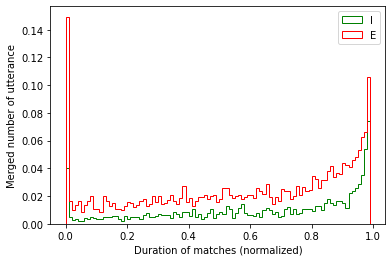

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="green",histtype='step',label='I', weights =weights_label1 )
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="red",histtype='step',label='E', weights =weights_label2)
plt.legend(loc='best')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of utterance')
plt.show()

# get utterance label on which duration data time = first msg - last msg

In [ ]:
import pandas as pd
ori_dataset = pd.read_csv('45k_before_finalise.csv')
ori_dataset.head()

In [ ]:
match_time_min_max_dict = {}
for index, row in ori_dataset.iterrows():
  if row['match_id'] in match_time_min_max_dict:
    min_time, max_time, total_time = match_time_min_max_dict[row['match_id']]
    assert row['time'] >= max_time
    match_time_min_max_dict[row['match_id']] = min_time, row['time'], row['time']-min_time
  else:
    match_time_min_max_dict[row['match_id']] = row['time'], row['time'], 0
match_time_min_max_dict

In [ ]:
label1 = 'I'
duration_list_for_label1 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label1:
    continue
  match_id = row['match_id']
  assert match_id in match_time_min_max_dict
  min_time,_,total_time = match_time_min_max_dict[match_id]
  if total_time == 0:
    continue
  duration_list_for_label1.append((row['time']-min_time)/total_time)
duration_list_for_label1

In [ ]:
label2 = 'E'
duration_list_for_label2 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label2:
    continue
  match_id = row['match_id']
  assert match_id in match_time_min_max_dict
  min_time,_,total_time = match_time_min_max_dict[match_id]
  if total_time == 0:
    continue
  duration_list_for_label2.append((row['time']-min_time)/total_time)
# duration_list

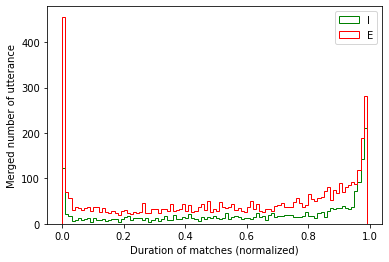

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="green",histtype='step',label='I')
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="red",histtype='step',label='E')
plt.legend(loc='best')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of utterance')
plt.show()

# get slot label on which duration time time = min - max

In [ ]:
import pandas as pd
ori_dataset = pd.read_csv('45k_before_finalise.csv')
ori_dataset.head()

In [ ]:
label1 = 'S'
duration_list_for_label1 = []
for index, row in ori_dataset.iterrows():
  # print(row['slot_label'])
  text = str(row['slot_label'])
  if text == 'nan':
    continue
  match_id = row['match_id']
  assert match_id in match_time_min_max_dict
  min_time,_, total_time = match_time_min_max_dict[match_id]
  if total_time == 0:
    continue
  text_arr = text.split()
  for t in text_arr:
    if t.strip() == label1:
      duration_list_for_label1.append((row['time']-min_time)/total_time)
#       print(duration_list_for_label1)
# duration_list_for_label1

In [ ]:
label2 = 'T'
duration_list_for_label2 = []
for index, row in ori_dataset.iterrows():
  # print(row['slot_label'])
  text = str(row['slot_label'])
  if text == 'nan':
    continue
  match_id = row['match_id']
  assert match_id in match_time_min_max_dict
  min_time,_, total_time = match_time_min_max_dict[match_id]
  if total_time == 0:
    continue
  text_arr = text.split()
  for t in text_arr:
    if t.strip() == label2:
      duration_list_for_label2.append((row['time']-min_time)/total_time)
#       print(duration_list_for_label1)
# duration_list_for_label1

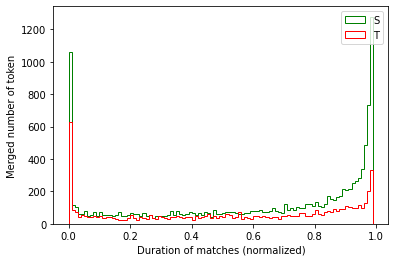

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="green",histtype='step',label='S')
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="red",histtype='step',label='T')
plt.legend(loc='best')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of token')
plt.show()

# get utterance label on which duration data

In [ ]:
import pandas as pd
ori_dataset = pd.read_csv('45k_before_finalise.csv')
ori_dataset.head()

,Unnamed: 0,match_id,conversation_id,utterance,time,slot,unit,Label,combined_annotation,final_label,review_label,word_level_data,slot_label,combined_annotation_version2
0,0,0,0,force it,-8,6,6k Slayer,A,"force (D), it (P),",A,NaN,force it,D P,"force (D), it (P),"
1,1,0,0,space created [SEPA] hah,5,1,Monkey,O,"space (O), created (O), [SEPA] (SEPA), hah (O),",O,NaN,space created [SEPA] hah,O O SEPA O,"space (O), created (O), [SEPA] (SEPA), hah (O),"
2,2,0,0,ez 500,9,6,6k Slayer,I,"ez (S), 500 (O),",I,NaN,ez 500,S O,"ez (S), 500 (O),"
3,3,0,1,mvp ulti,934,4,Kira,O,"mvp (O), ulti (S),",O,NaN,mvp ulti,O S,"mvp (O), ulti (S),"
4,4,0,2,bye,1486,6,6k Slayer,O,"bye (O),",O,NaN,bye,O,"bye (O),"


In [ ]:
label1 = 'I'
duration_list_for_label1 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label1:
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  if row['time'] > duration_match:
    duration_list_for_label1.append(1)
  # elif row['time']<= 0:
  #   duration_list_for_label1.append(0)
  else:
    duration_list_for_label1.append(row['time']/duration_match)
label1_total_count = len(duration_list_for_label1)

In [ ]:
label2 = 'E'
duration_list_for_label2 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label2:
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  if row['time'] > duration_match:
    duration_list_for_label2.append(1)
  # elif row['time']<= 0:
  #   duration_list_for_label2.append(0)
  else:
    duration_list_for_label2.append(row['time']/duration_match)
label2_total_count = len(duration_list_for_label2)

In [ ]:
label3 = 'A'
duration_list_for_label3 = []
for index, row in ori_dataset.iterrows():
  label = row['final_label']
  if label != label3:
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  if row['time'] > duration_match:
    duration_list_for_label3.append(1)
  # elif row['time']<= 0:
  #   duration_list_for_label2.append(0)
  else:
    duration_list_for_label3.append(row['time']/duration_match)
label3_total_count = len(duration_list_for_label3)

In [ ]:
# label4 = 'O'
# duration_list_for_label4 = []
# for index, row in ori_dataset.iterrows():
#   label = row['final_label']
#   if label != label4:
#     continue
#   match_id = row['match_id']
#   assert match_id in match_duration_dict
#   duration_match = match_duration_dict[match_id]
#   if row['time'] > duration_match:
#     duration_list_for_label4.append(1)
#   # elif row['time']<= 0:
#   #   duration_list_for_label2.append(0)
#   else:
#     duration_list_for_label4.append(row['time']/duration_match)
# # duration_list

In [ ]:
# duration_list_for_label3 = []
# for index, row in ori_dataset.iterrows():
#   match_id = row['match_id']
#   assert match_id in match_duration_dict
#   duration_match = match_duration_dict[match_id]
#   if row['time'] > duration_match:
#     duration_list_for_label3.append(1)
#   # elif row['time']<= 0:
#   #   duration_list_for_label2.append(0)
#   else:
#     duration_list_for_label3.append(row['time']/duration_match)
# len(duration_list_for_label3)

44869

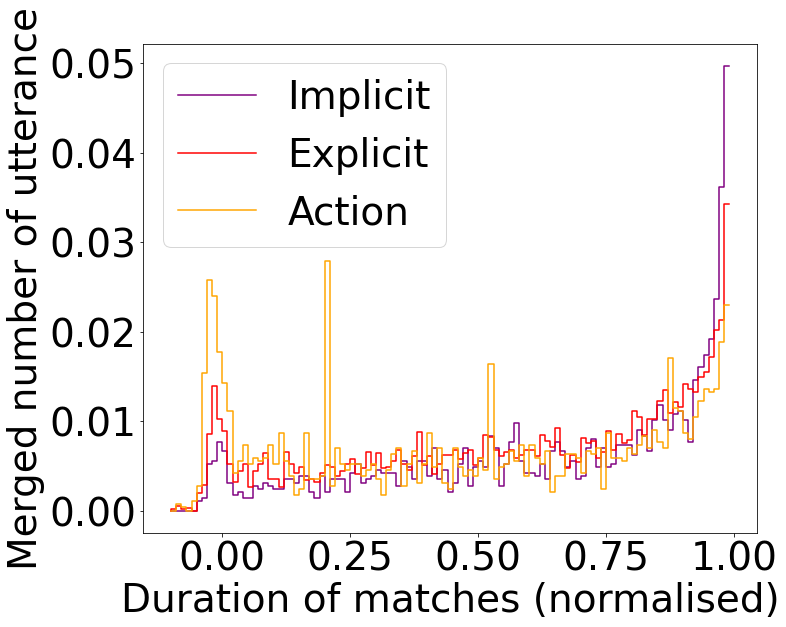

In [ ]:
import matplotlib.pyplot as plt
# def get_step_data(duration_list):
#   bins = [i/100 for i in range(-10,100)]
#   step_y = [0]
#   for i in range(len(bins)-1):
#     count = 0
#     lower_bound = bins[i]
#     upper_bound = bins[i+1]
#     for duration in duration_list:
#       if duration>=lower_bound and duration<=upper_bound:
#         count+=1
#     step_y.append(count)
#   return step_y

# normalised count
def get_step_data(duration_list, total_count):
  bins = [i/100 for i in range(-10,100)]
  step_y = [0]
  for i in range(len(bins)-1):
    count = 0
    lower_bound = bins[i]
    upper_bound = bins[i+1]
    for duration in duration_list:
      if duration>=lower_bound and duration<=upper_bound:
        count+=1
    # print(count)
    step_y.append(count/total_count)
  return step_y

import numpy as np
plt.rcParams['figure.figsize'] = [11, 9]
plt.rcParams['font.size'] = 39
x = [i/100 for i in range(-10,100)]
y1 = get_step_data(duration_list_for_label1,label1_total_count)
# print(1/0)
y2 = get_step_data(duration_list_for_label2,label2_total_count)
y3 = get_step_data(duration_list_for_label3,label3_total_count)
# y4 = get_step_data(duration_list_for_label4)
plt.step(x, y1 ,color = 'purple',linewidth=1.5, label='Implicit')
plt.step(x, y2 ,color = 'red',linewidth=1.5, label='Explicit')
plt.step(x, y3 ,color = 'orange',linewidth=1.5, label='Action')
# plt.step(x, y4 ,color = 'grey',linewidth=1.5, label='Other')
plt.legend(loc=2)
plt.xlabel('Duration of matches (normalised)')
plt.ylabel('Merged number of utterance')
plt.show()
# plt.show()


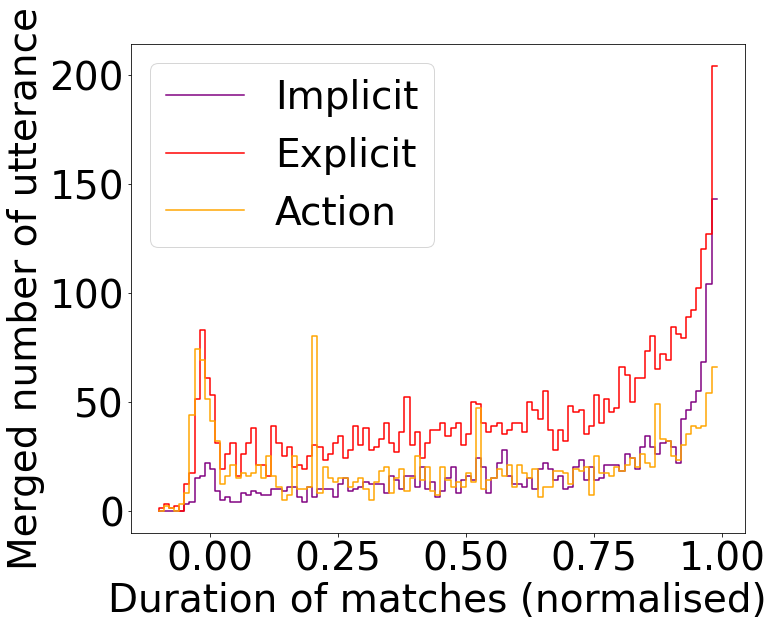

In [ ]:
import matplotlib.pyplot as plt
def get_step_data(duration_list):
  bins = [i/100 for i in range(-10,100)]
  step_y = [0]
  for i in range(len(bins)-1):
    count = 0
    lower_bound = bins[i]
    upper_bound = bins[i+1]
    for duration in duration_list:
      if duration>=lower_bound and duration<=upper_bound:
        count+=1
    step_y.append(count)
  return step_y

import numpy as np
plt.rcParams['figure.figsize'] = [11, 9]
plt.rcParams['font.size'] = 39
x = [i/100 for i in range(-10,100)]
y1 = get_step_data(duration_list_for_label1)
y2 = get_step_data(duration_list_for_label2)
y3 = get_step_data(duration_list_for_label3)
y4 = get_step_data(duration_list_for_label4)
plt.step(x, y1 ,color = 'purple',linewidth=1.5, label='Implicit')
plt.step(x, y2 ,color = 'red',linewidth=1.5, label='Explicit')
plt.step(x, y3 ,color = 'orange',linewidth=1.5, label='Action')
# plt.step(x, y4 ,color = 'grey',linewidth=1.5, label='Other')
plt.legend(loc=2)
plt.xlabel('Duration of matches (normalised)')
plt.ylabel('Merged number of utterance')
plt.show()
plt.show()


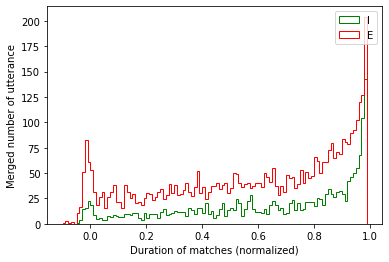

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="green",histtype='step',label='I')
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="red",histtype='step',label='E')
plt.legend(loc='best')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of utterance')
plt.show()

In [ ]:
len(duration_list_for_label2)

5952

# get slot label on which duration time

In [ ]:
import pandas as pd
ori_dataset = pd.read_csv('45k_before_finalise.csv')
ori_dataset.head()

,Unnamed: 0,match_id,conversation_id,utterance,time,slot,unit,Label,combined_annotation,final_label,review_label,word_level_data,slot_label,combined_annotation_version2
0,0,0,0,force it,-8,6,6k Slayer,A,"force (D), it (P),",A,NaN,force it,D P,"force (D), it (P),"
1,1,0,0,space created [SEPA] hah,5,1,Monkey,O,"space (O), created (O), [SEPA] (SEPA), hah (O),",O,NaN,space created [SEPA] hah,O O SEPA O,"space (O), created (O), [SEPA] (SEPA), hah (O),"
2,2,0,0,ez 500,9,6,6k Slayer,I,"ez (S), 500 (O),",I,NaN,ez 500,S O,"ez (S), 500 (O),"
3,3,0,1,mvp ulti,934,4,Kira,O,"mvp (O), ulti (S),",O,NaN,mvp ulti,O S,"mvp (O), ulti (S),"
4,4,0,2,bye,1486,6,6k Slayer,O,"bye (O),",O,NaN,bye,O,"bye (O),"


In [ ]:
label1 = 'S'
duration_list_for_label1 = []
for index, row in ori_dataset.iterrows():
  # print(row['slot_label'])
  text = str(row['slot_label'])
  if text == 'nan':
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  text_arr = text.split()
  for t in text_arr:
    if t.strip() == label1:
      # print('in')
      if row['time'] > duration_match:
        duration_list_for_label1.append(1)
      # elif row['time']<= 0:
      #   duration_list_for_label1.append(0)
      else:
        duration_list_for_label1.append(row['time']/duration_match)
#       print(duration_list_for_label1)
# duration_list_for_label1

In [ ]:
weights_label1 = [1/match_total_num for i in range(len(duration_list_for_label1))]

In [ ]:
label2 = 'T'
duration_list_for_label2 = []
for index, row in ori_dataset.iterrows():
  # print(row['slot_label'])
  text = str(row['slot_label'])
  if text == 'nan':
    continue
  match_id = row['match_id']
  assert match_id in match_duration_dict
  duration_match = match_duration_dict[match_id]
  text_arr = text.split()
  for t in text_arr:
    if t.strip() == label2:
      # print('in')
      if row['time'] > duration_match:
        duration_list_for_label2.append(1)
      # elif row['time']<= 0:
      #   duration_list_for_label2.append(0)
      else:
        duration_list_for_label2.append(row['time']/duration_match)
#       print(duration_list_for_label1)
# duration_list_for_label1

In [ ]:
# duration_list_for_label3 = []
# for index, row in ori_dataset.iterrows():
#   # print(row['slot_label'])
#   text = str(row['slot_label'])
#   if text == 'nan':
#     continue
#   match_id = row['match_id']
#   assert match_id in match_duration_dict
#   duration_match = match_duration_dict[match_id]
#   text_arr = text.split()
#   for t in text_arr:
#       if row['time'] > duration_match:
#         duration_list_for_label3.append(1)
#       else:
#         duration_list_for_label3.append(row['time']/duration_match)
# len(duration_list_for_label3)

166613

In [ ]:
weights_label2 = [1/match_total_num for i in range(len(duration_list_for_label2))]

In [ ]:
def get_step_data(duration_list):
  bins = [i/100 for i in range(-10,100)]
  step_y = [0]
  for i in range(len(bins)-1):
    count = 0
    lower_bound = bins[i]
    upper_bound = bins[i+1]
    for duration in duration_list:
      if duration>=lower_bound and duration<=upper_bound:
        count+=1
    step_y.append(count)
  return step_y

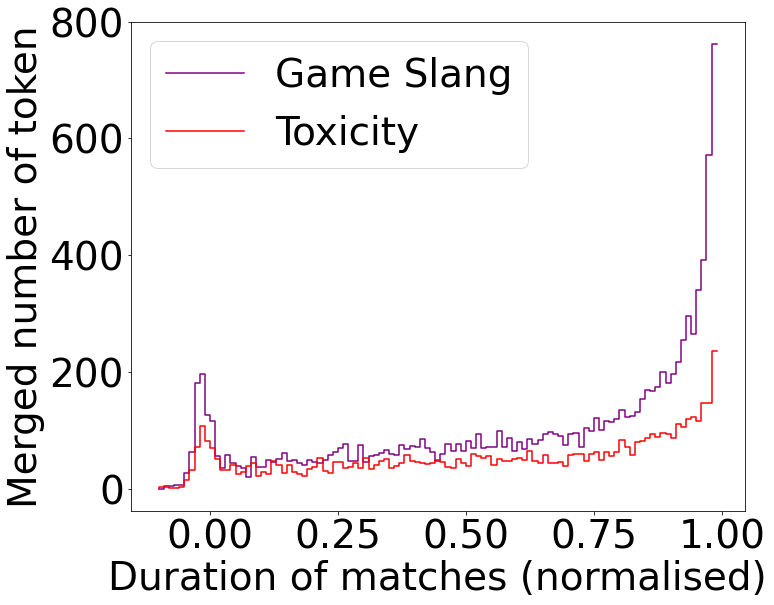

In [ ]:
import numpy as np
plt.rcParams['figure.figsize'] = [11, 9]
plt.rcParams['font.size'] = 39
x = [i/100 for i in range(-10,100)]
y1 = get_step_data(duration_list_for_label1)
# print(y1)
y2 = get_step_data(duration_list_for_label2)
plt.step(x, y1 ,color = 'purple',linewidth=1.5, label='Game Slang')
plt.step(x, y2 ,color = 'red',linewidth=1.5, label='Toxicity')
plt.legend(loc=2)
# plt.margins(10)
plt.xlabel('Duration of matches (normalised)')
plt.ylabel('Merged number of token')
# plt.subplots_adjust(top = 1)
plt.show()
plt.show()


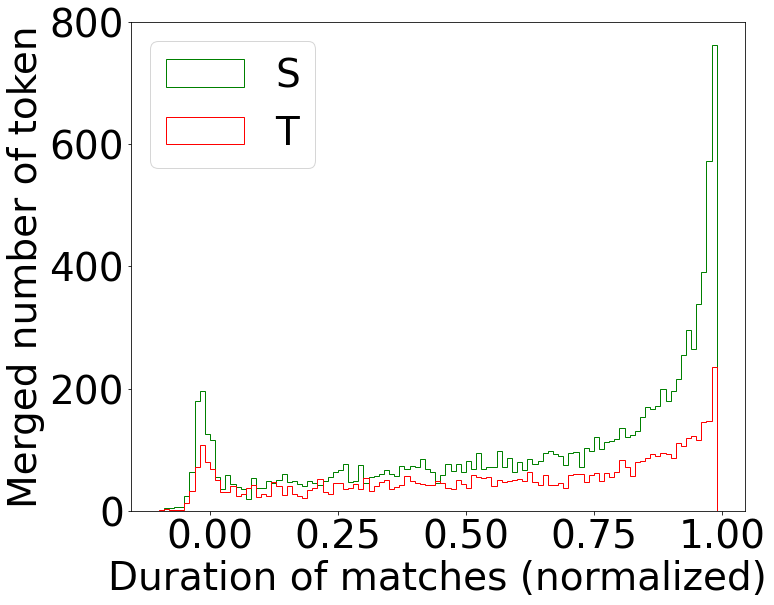

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="green",histtype='step',label='S', linewidth=1)
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="red",histtype='step',label='T')
plt.legend(loc='upper left')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of token')
plt.show()

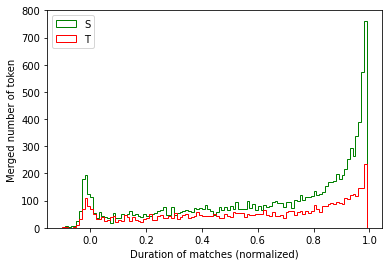

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="green",histtype='step',label='S', linewidth=1)
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="red",histtype='step',label='T')
plt.legend(loc='upper left')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of token')
plt.show()

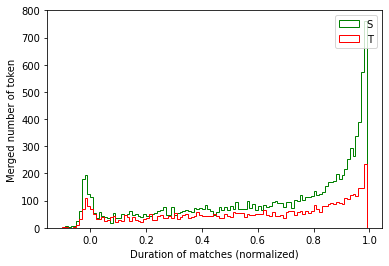

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="green",histtype='step',label='S')
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(-10,100)],range=(-1,1),edgecolor="red",histtype='step',label='T')
plt.legend(loc='best')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of token')
plt.show()

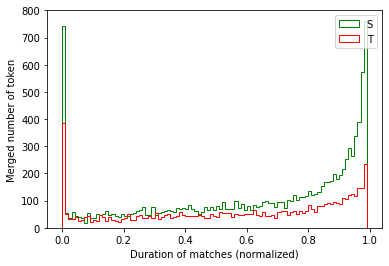

In [ ]:
import matplotlib.pyplot as plt
plt.hist(duration_list_for_label1,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="green",histtype='step',label='S')
plt.hist(duration_list_for_label2,bins=[i/100 for i in range(0,100)],range=(0,1),edgecolor="red",histtype='step',label='T')
plt.legend(loc='best')
plt.xlabel('Duration of matches (normalized)')
plt.ylabel('Merged number of token')
plt.show()